# Simple Non-Linear Regression Model

## Objectives

1. **Import Necessary Libraries**: Import libraries required for data manipulation, visualization, and model building.

2. **Generate Non-Linear Regression Data**: 
   - Create a synthetic non-linear regression dataset with added noise.
   - Convert the dataset into a pandas DataFrame and save it as a CSV file.

3. **Visualize the Data**: Use a scatter plot to visualize the generated non-linear regression data.

4. **Split the Dataset**: 
   - Divide the dataset into training, cross-validation, and testing sets.
   - Visualize the split datasets.

5. **Create Polynomial Features**: Implement a function to apply polynomial features to the single-feature data.

6. **Train Non-Linear Regression Models**: 
   - Implement a function to train non-linear regression models.
   - Train four different polynomial regression models of degrees 2, 3, 4, and 5 using standardized data.

7. **Visualize Models on Training Data**: Plot the fitted models on the training data to assess their performance.

8. **Visualize Learning Curves**: Plot learning curves for each model to understand the convergence behavior.

9. **Evaluate Models on Cross-Validation and Testing Data**: 
   - Assess each model's performance on the cross-validation dataset using the RMSE metric.
   - Evaluate the final selected model and also other models on the testing dataset.

10. **Compare with Scikit-Learn Model**: 
    - Build and train a 3rd-degree polynomial regression model using scikit-learn.
    - Compare the performance of the scikit-learn model with the final selected 3rd-degree polynomial model.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate the feature data
x = np.linspace(-10, 10, 200)

# Add some Gaussian noise
noise = np.random.normal(0, 100, x.shape)

# Define a non-linear relationship (e.g., a cubic function) and generate the target data with added noise
y = 0.5 * x**3 - 2 * x**2 + x + 10 + noise

# Convert the x and y data to pandas dataframe and save the dataframe to a CSV file
df = pd.DataFrame({"x": x, "y": y})
df.to_csv("simple_non_linear_regression_dataset.csv", index=False)

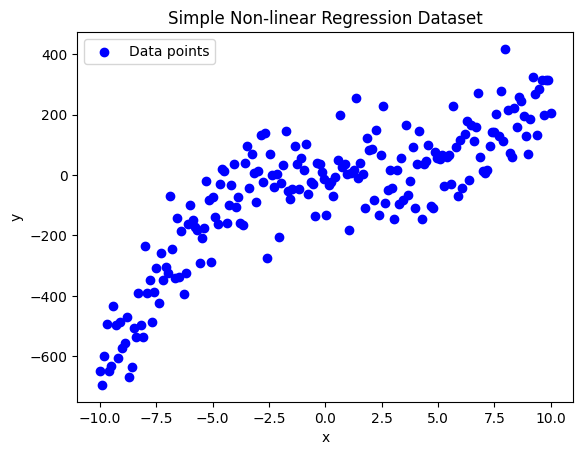

In [3]:
# Plot the data to visualize it
plt.scatter(x, y, color="blue", label="Data points")
plt.title("Simple Non-linear Regression Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

The above plot shows the data with added noise. Real-world data often contains noise due to measurement errors, environmental factors, or other unpredictable influences. Adding noise makes the dataset more realistic and can help create models that generalize better to real-world scenarios.

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training+validation and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42) 

# Print the sizes of each split
print("Training set size:", len(x_train))
print("Cross-validation set size:", len(x_val))
print("Testing set size:", len(x_test))

Training set size: 120
Cross-validation set size: 40
Testing set size: 40


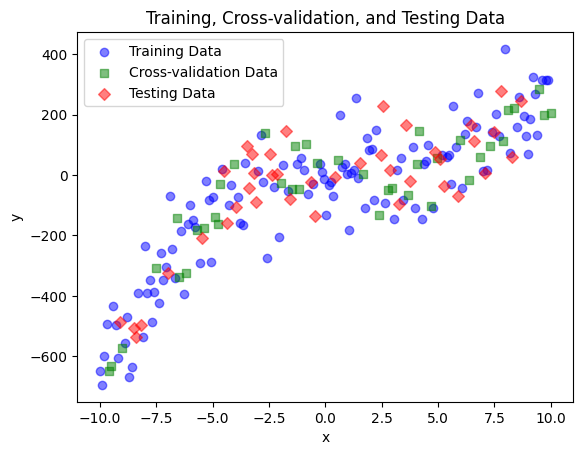

In [5]:
# Plot the training, cross-validation, and testing data sets to visualize it

# Training data set
plt.scatter(x_train, y_train, c="blue", marker="o", label="Training Data", alpha=0.5)

# Cross-validation data set
plt.scatter(x_val, y_val, c="green", marker="s", label="Cross-validation Data", alpha=0.5)

# Testing data set
plt.scatter(x_test, y_test, c="red", marker="D", label="Testing Data", alpha=0.5)

# Adding title and labels
plt.title("Training, Cross-validation, and Testing Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

We have split our data into three sets: training, cross-validation, and testing. We will fit three to four non-linear/polynomial regression models. First, we will train our models on the training data. Then, we will evaluate each model on the cross-validation data, comparing the results using the RMSE metric to identify the best-performing model. Finally, we will test our selected model on the testing data and compare its performance with a model from scikit-learn.

Because we will use multiple models, we will represent each model using a vectorized approach with the following equation. After applying polynomial features to our single feature $\mathbf{x}$, we can represent each feature as a matrix $\mathbf{X}$. This can be represented as a linear regression model as follows:

$$
\begin{equation}
\hat{\mathbf{y}} = f(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $\mathbf{X}$ represents the matrix of input features (independent variables),
- $\mathbf{w}$ represents the vector of weights (coefficients),
- $b$ represents the $y$-intercept (bias term).

Our goal is to find the optimal values of $\mathbf{w}$ and $b$ for each model that minimize the Root Mean Square Error (RMSE) cost function. The RMSE is defined as:

$$
\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2} \tag{2}
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y}_i$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \times \frac{\partial \text{RMSE}}{\partial w_j} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{RMSE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $j = 1, 2, 3, \ldots, n$
- $w_{j, \text{new}}$ and $w_{j, \text{old}}$ are the updated and current weights for the $j$-th feature, respectively,
- $b_{\text{new}}$ and $b_{\text{old}}$ are the updated and current $y$-intercepts, respectively,
- $\alpha$ is the learning rate,
- $\frac{\partial \text{RMSE}}{\partial w_j}$ is the gradient of the (RMSE) with respect to the $j$-th weight,
- $\frac{\partial \text{RMSE}}{\partial b}$ is the gradient of the (RMSE) with respect to the $y$-intercept.

and,

$$
\begin{equation}
\frac{\partial \text{RMSE}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    x^j_i & \text{if } (\hat{y_i} - y_i) \geq 0 \\
    -x^j_i & \text{if } (\hat{y_i} - y_i)  < 0
\end{cases} \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{RMSE}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    1 & \text{if } (\hat{y_i} - y_i) \geq 0 \\
    -1 & \text{if } (\hat{y_i} - y_i)  < 0
\end{cases} \tag{6}
\end{equation}
$$

In [6]:
def polynomial_features_single(x: np.ndarray, degree: int):
    """
    Generate polynomial features for a single feature.

    Parameters:
    x (numpy.ndarray): Standardize input data of shape (n_samples,)
    degree (int): The degree of the polynomial features.

    Returns:
    X_poly (ndarray): Transformed data matrix with polynomial features.
    
    """

    x = x.reshape(-1, 1)  # Ensure x is a column vector
    n_samples = x.shape[0]

    # Initialize the output matrix
    X_poly = np.ones((n_samples, degree))

    for i in range(degree):
        X_poly[:, i] = x[:, 0] ** (degree - i)

    return X_poly

In [7]:
def train_simple_non_lr_model(x, y, degree, alpha=0.1, iterations=5000):
    """
    Train a simple non-linear regression model using polynomial features.

    Parameters:
    x (numpy.ndarray): Standardize input feature data of shape (n_samples,)
    y (numpy.ndarray): Target data of shape (n_samples,)
    degree (int): The degree of the polynomial features.
    alpha (float): Learning rate for gradient descent.
    iterations (int): Number of iterations for gradient descent.

    Returns:
    X_poly (ndarray): A numpy array containing the polynomial features of the standardize input data.
    w (ndarray): Final weights after training.
    b (float): Final bias after training.
    learning_curve_data (ndarray): Data for learning curve (iterations vs cost).
    
    """

    # Generate polynomial features
    X_poly = polynomial_features_single(x, degree)
    
    # Initialize weights randomly
    w = np.random.rand(degree)
    b = 0  # Initialize bias

    # List to store learning curve data
    learning_curve_data = []

    # Gradient descent loop
    for i in range(iterations):
        # Compute model predictions
        y_hat = np.dot(X_poly, w) + b

        # Compute root mean square error (RMSE) cost
        cost = np.sqrt(np.sum((y - y_hat)**2) / len(y))

        # Record cost for every 100 iterations
        if ((i+1) % 100) == 0:
            learning_curve_data.append([i+1, cost])

        # Update weights and bias using gradient descent
        if (i+1) != iterations:
            for j in range(len(w)):
                # Update each weight
                w[j] = w[j] - alpha * (np.sum(np.where((y_hat - y >= 0), X_poly[:, j], -X_poly[:, j])) / len(y))

            # Update bias
            b = b - alpha * (np.sum(np.where((y_hat - y >= 0), 1, -1)) / len(y))

    return X_poly, w, b, np.array(learning_curve_data)

In [8]:
# Standardize the training data for efficient model performance.
x_train_scaled = (x_train - x_train.mean()) / x_train.std()

# Train degree 2 polynomial model
X_poly_d2, w_d2, b_d2, lcd_d2 = train_simple_non_lr_model(x_train_scaled, y_train, 2, alpha=0.5)

# Train degree 3 polynomial model
X_poly_d3, w_d3, b_d3, lcd_d3 = train_simple_non_lr_model(x_train_scaled, y_train, 3)

# Train degree 4 polynomial model
X_poly_d4, w_d4, b_d4, lcd_d4 = train_simple_non_lr_model(x_train_scaled, y_train, 4)

# Train degree 5 polynomial model
X_poly_d5, w_d5, b_d5, lcd_d5 = train_simple_non_lr_model(x_train_scaled, y_train, 5)

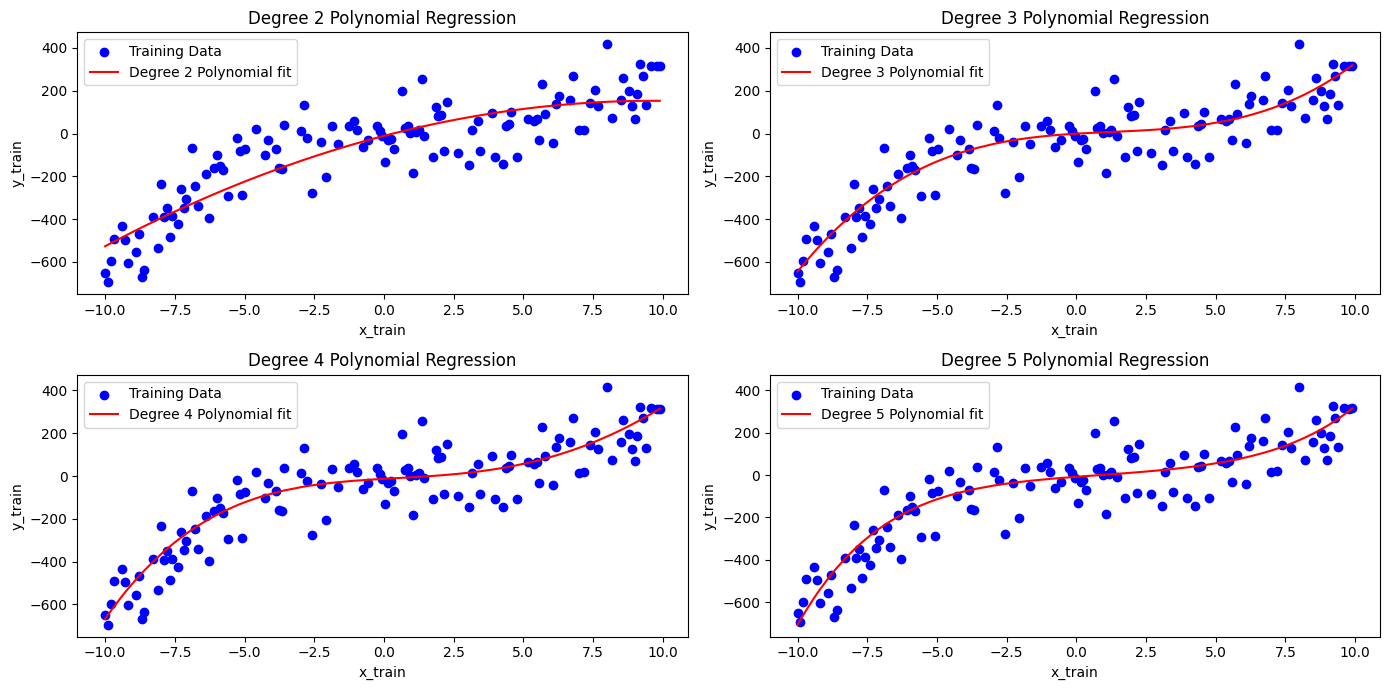

In [9]:
# Store all the trained models in the list for visualization purpose
all_models = [(X_poly_d2, w_d2, b_d2), (X_poly_d3, w_d3, b_d3), (X_poly_d4, w_d4, b_d4), (X_poly_d5, w_d5, b_d5)]

# Create a 2x2 grid of subplots and flatten axes for easy access
_, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.flatten()

# Sort the data by the x_train data set to ensure the line plot is correctly ordered
sorted_indices = np.argsort(x_train)

# Plot all the polynomial models
for i, model in enumerate(all_models):
    axes[i].scatter(x_train, y_train, color="blue", label="Training Data")
    axes[i].plot(x_train[sorted_indices], (np.dot(model[0], model[1]) + model[2])[sorted_indices], color="red", label=f"Degree {i+2} Polynomial fit")
    axes[i].set_title(f"Degree {i+2} Polynomial Regression")
    axes[i].set_xlabel("x_train")
    axes[i].set_ylabel("y_train")
    axes[i].legend()

    plt.tight_layout()

By looking at the above plots of polynomial regression models of degrees 2, 3, 4, and 5, it is evident that the polynomial model of degree 2 performs poorly on the training data. In contrast, the polynomial models of degrees 3, 4, and 5 appear nearly identical, with no significant visual changes in the fitted lines. This indicates that these models fit the training data well. The data points that appear to be far from the fitted line are due to the added noise in the dataset, making the dataset look more realistic.

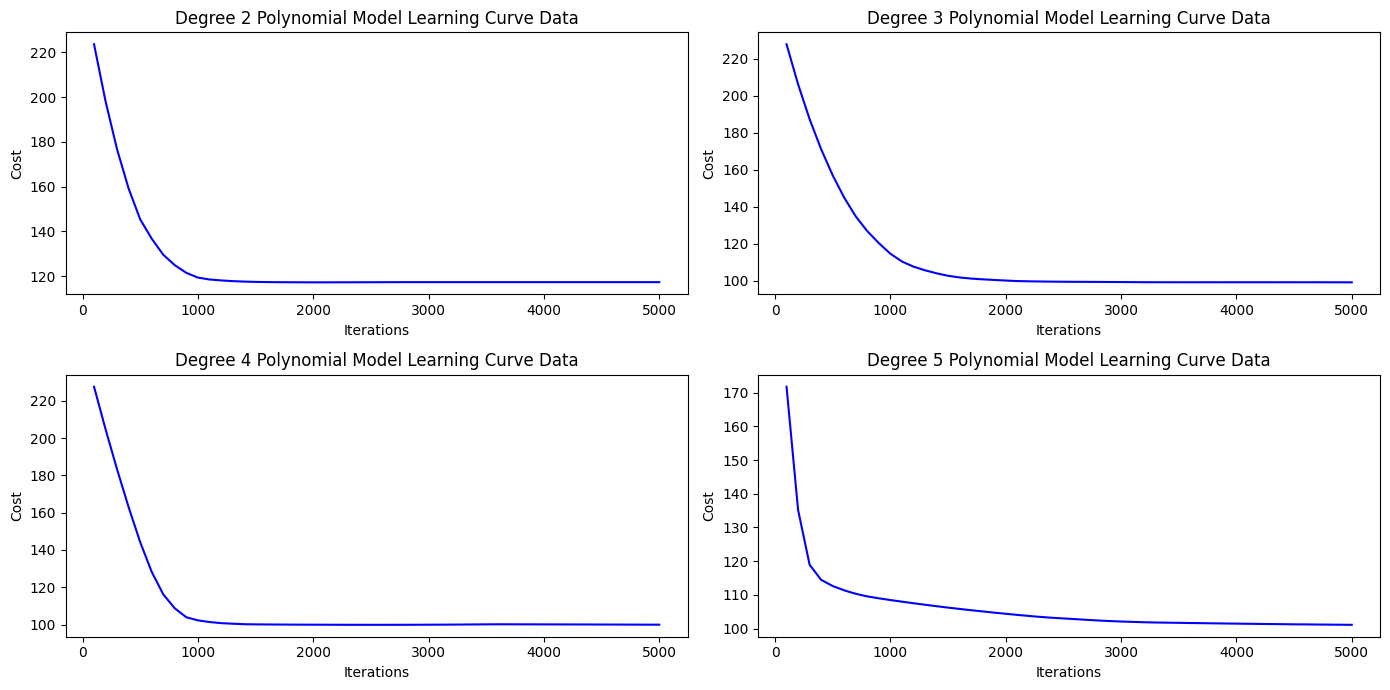

In [10]:
# Store all the trained models learning curve data in the list for visualization purpose
all_models_lcd = [lcd_d2, lcd_d3, lcd_d4, lcd_d5]

# Create a 2x2 grid of subplots and flatten axes for easy access
_, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.flatten()

# Plot all models lcd
for i, lcd in enumerate(all_models_lcd):
    axes[i].plot(lcd[:, 0], lcd[:, 1], color="blue")
    axes[i].set_title(f"Degree {i+2} Polynomial Model Learning Curve Data")
    axes[i].set_xlabel("Iterations")
    axes[i].set_ylabel("Cost")

    plt.tight_layout()

Looking at the learning curve data, the polynomial models of degrees 2 and 4 converge at approximately **1300** iterations, while the polynomial model of degree 3 converges at about **2500** iterations, and the model of degree 5 converges at roughly **4000** iterations. The initial cost for models of degrees 2, 3, and 4 is around **240**, with the degree 5 model starting at approximately **175**. Models of degrees 3, 4, and 5 achieve a minimum cost of around **105**, while the degree 2 model achieves about **120**. To determine the best polynomial degree model, we will evaluate each model on the cross-validation data and compare both training and cross-validation results using the RMSE metric to select the optimal model.

In [11]:
# Scale the cross-validation data set using the mean and standard deviation of the training data
x_val_scaled = (x_val - x_train.mean()) / x_train.std()

# Predict the target variable and calculate RMSE for degree 2 polynomial model on cross-validation data
y_pred_val_d2 = np.dot(polynomial_features_single(x_val_scaled, 2), w_d2) + b_d2
rmse_val_d2 = np.sqrt(np.sum((y_val - y_pred_val_d2)**2) / len(y_val))

# Predict the target variable and calculate RMSE for degree 3 polynomial model on cross-validation data
y_pred_val_d3 = np.dot(polynomial_features_single(x_val_scaled, 3), w_d3) + b_d3
rmse_val_d3 = np.sqrt(np.sum((y_val - y_pred_val_d3)**2) / len(y_val))

# Predict the target variable and calculate RMSE for degree 4 polynomial model on cross-validation data
y_pred_val_d4 = np.dot(polynomial_features_single(x_val_scaled, 4), w_d4) + b_d4
rmse_val_d4 = np.sqrt(np.sum((y_val - y_pred_val_d4)**2) / len(y_val))

# Predict the target variable and calculate RMSE for degree 5 polynomial model on cross-validation data
y_pred_val_d5 = np.dot(polynomial_features_single(x_val_scaled, 5), w_d5) + b_d5
rmse_val_d5 = np.sqrt(np.sum((y_val - y_pred_val_d5)**2) / len(y_val))


print(f"RMSE of degree 2 polynomial model on training data: {lcd_d2[-1][1]}")
print(f"RMSE of degree 2 polynomial model on cross-validation data: {rmse_val_d2}")

print("\n------------------------------\n")

print(f"RMSE of degree 3 polynomial model on training data: {lcd_d3[-1][1]}")
print(f"RMSE of degree 3 polynomial model on cross-validation data: {rmse_val_d3}")

print("\n------------------------------\n")

print(f"RMSE of degree 4 polynomial model on training data: {lcd_d4[-1][1]}")
print(f"RMSE of degree 4 polynomial model on cross-validation data: {rmse_val_d4}")

print("\n------------------------------\n")

print(f"RMSE of degree 5 polynomial model on training data: {lcd_d5[-1][1]}")
print(f"RMSE of degree 5 polynomial model on cross-validation data: {rmse_val_d5}")

RMSE of degree 2 polynomial model on training data: 117.38964891764445
RMSE of degree 2 polynomial model on cross-validation data: 113.36066888536105

------------------------------

RMSE of degree 3 polynomial model on training data: 99.15629225923566
RMSE of degree 3 polynomial model on cross-validation data: 80.28055737785309

------------------------------

RMSE of degree 4 polynomial model on training data: 99.95795863064379
RMSE of degree 4 polynomial model on cross-validation data: 81.6761576986607

------------------------------

RMSE of degree 5 polynomial model on training data: 101.11183796944242
RMSE of degree 5 polynomial model on cross-validation data: 81.4714443614152


Based on the above RMSE values for polynomial regression models of varying degrees, the 2nd-degree polynomial model shows the highest RMSE on both training **(117.39)** and cross-validation data **(113.36)**, indicating underfitting. The 3rd-degree polynomial model significantly reduces RMSE on both training **(99.16)** and cross-validation data **(80.28)**, indicating a better fit and superior generalization. In contrast, the 4th (training RMSE: **99.96**, cross-validation RMSE: **81.68**) and 5th-degree models (training RMSE: **101.11**, cross-validation RMSE: **81.47**) do not offer substantial improvements and suggest potential overfitting or diminishing returns from added complexity. Therefore, the 3rd-degree polynomial model is the best choice for its optimal balance of complexity and predictive performance. Now it's time to test our optimal model on testing data, but for intuition, we will test all four models on the testing data.

In [12]:
# Scale the testing data set using the mean and standard deviation of the training data
x_test_scaled = (x_test - x_train.mean()) / x_train.std()

# Predict the target variable and calculate RMSE for degree 2 polynomial model on testing data
y_pred_test_d2 = np.dot(polynomial_features_single(x_test_scaled, 2), w_d2) + b_d2
rmse_test_d2 = np.sqrt(np.sum((y_test - y_pred_test_d2)**2) / len(y_test))

# Predict the target variable and calculate RMSE for degree 3 polynomial model on testing data
y_pred_test_d3 = np.dot(polynomial_features_single(x_test_scaled, 3), w_d3) + b_d3
rmse_test_d3 = np.sqrt(np.sum((y_test - y_pred_test_d3)**2) / len(y_test))

# Predict the target variable and calculate RMSE for degree 4 polynomial model on testing data
y_pred_test_d4 = np.dot(polynomial_features_single(x_test_scaled, 4), w_d4) + b_d4
rmse_test_d4 = np.sqrt(np.sum((y_test - y_pred_test_d4)**2) / len(y_test))

# Predict the target variable and calculate RMSE for degree 5 polynomial model on testing data
y_pred_test_d5 = np.dot(polynomial_features_single(x_test_scaled, 5), w_d5) + b_d5
rmse_test_d5 = np.sqrt(np.sum((y_test - y_pred_test_d5)**2) / len(y_test))


print(f"RMSE of degree 2 polynomial model on testing data: {rmse_test_d2}")

print("\n------------------------------\n")

print(f"RMSE of degree 3 polynomial model on testing data: {rmse_test_d3}")

print("\n------------------------------\n")

print(f"RMSE of degree 4 polynomial model on testing data: {rmse_test_d4}")

print("\n------------------------------\n")

print(f"RMSE of degree 5 polynomial model on testing data: {rmse_test_d5}")

RMSE of degree 2 polynomial model on testing data: 115.41793773758809

------------------------------

RMSE of degree 3 polynomial model on testing data: 90.78267413943978

------------------------------

RMSE of degree 4 polynomial model on testing data: 93.07073508528696

------------------------------

RMSE of degree 5 polynomial model on testing data: 92.59664520385901


The above testing data results show that the 2nd-degree polynomial model has the highest RMSE at **115.42**, indicating it performs poorly compared to higher-degree models. The 3rd-degree polynomial model achieves the lowest RMSE of **90.78**, demonstrating the best fit and predictive accuracy. The 4th-degree model has an RMSE of **93.07**, and the 5th-degree model has an RMSE of **92.60**. These results confirm that the 3rd-degree polynomial model provides the best balance of complexity and performance, as it outperforms both simpler and more complex models on the testing data. Now, we will train a 3rd-degree polynomial model using scikit-learn and compare all training, cross-validation, and testing results with our optimal 3rd-degree polynomial model.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Transform features into polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train_scaled.reshape(-1, 1))
X_val_poly = poly.transform(x_val_scaled.reshape(-1, 1))
X_test_poly = poly.transform(x_test_scaled.reshape(-1, 1))

# Fit a linear regression model on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Results of Scikit-Learn Model of Degree 3 Polynomial Regression\n")
print(f"Train R2: {train_r2}")
print(f"Val R2: {val_r2}")
print(f"Test R2: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Val RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

print("\n--------\n")

print("Results of Our Model of Degree 3 Polynomial Regression\n")
print(f"Train R2: {r2_score(y_train, np.dot(X_poly_d3, w_d3) + b_d3)}")
print(f"Val R2: {r2_score(y_val, y_pred_val_d3)}")
print(f"Test R2: {r2_score(y_test, y_pred_test_d3)}")
print(f"Train RMSE: {lcd_d3[-1][1]}")
print(f"Val RMSE: {rmse_val_d3}")
print(f"Test RMSE: {rmse_test_d3}")

Results of Scikit-Learn Model of Degree 3 Polynomial Regression

Train R2: 0.8337669284786269
Val R2: 0.8749408863156136
Test R2: 0.7925995691792469
Train RMSE: 98.4479203674823
Val RMSE: 77.21950913228729
Test RMSE: 89.75627997482734

--------

Results of Our Model of Degree 3 Polynomial Regression

Train R2: 0.8313660960118482
Val R2: 0.8648294654010724
Test R2: 0.7878290564228025
Train RMSE: 99.15629225923566
Val RMSE: 80.28055737785309
Test RMSE: 90.78267413943978


Both models demonstrated excellent performance, with our custom-built model showing comparable results to the Scikit-Learn model. This project highlights the effectiveness of polynomial regression in capturing non-linear relationships within data and emphasizes the importance of rigorous model evaluation for ensuring reliability and accuracy. It marks the completion of a thorough and insightful journey into simple non-linear regression modeling.